In [ ]:
# Ensure TensorFlow is installed

import tensorflow
from tensorflow.keras.datasets import boston_housing # type: ignore

# Load dataset (506 total samples, 13 features)
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
print("Training data shape:", x_train.shape, "Test data shape:", x_test.shape)
print("Training targets shape:", y_train.shape, "Test targets shape:", y_test.shape)


Training data shape: (404, 13) Test data shape: (102, 13)
Training targets shape: (404,) Test targets shape: (102,)


In [2]:
import numpy as np

# Compute mean and std on training features
feature_mean = np.mean(x_train, axis=0)
feature_std  = np.std(x_train, axis=0)

# Standardize training and test features
x_train_norm = (x_train - feature_mean) / feature_std
x_test_norm  = (x_test  - feature_mean) / feature_std


In [3]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(13,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)   # Linear output for regression
])
model.summary()


d:\JNotebook\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [5]:
history = model.fit(
    x_train_norm, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 509.6650 - mae: 20.4490 - val_loss: 540.8526 - val_mae: 21.3886
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 433.4958 - mae: 18.7205 - val_loss: 477.7887 - val_mae: 19.9435
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 405.6962 - mae: 18.2758 - val_loss: 401.4826 - val_mae: 18.0691
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 371.8698 - mae: 17.0583 - val_loss: 314.1807 - val_mae: 15.7070
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 237.0160 - mae: 13.5002 - val_loss: 224.6000 - val_mae: 12.7719
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 161.9903 - mae: 10.5380 - val_loss: 145.5902 - val_mae: 9.5097
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 100.5795 - mae: 7.7834 - val_loss: 94.1844 - val_mae: 7.4075
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 67.6152 - mae: 6.1798 - val_loss: 68.8823 - val_mae: 6.2703
Epoch 9/100
11/11 ━━━━━

In [6]:
test_loss, test_mae = model.evaluate(x_test_norm, y_test, verbose=0)
print(f"Test MSE: {test_loss:.2f}, Test MAE: {test_mae:.2f}")


Test MSE: 23.70, Test MAE: 3.05


In [7]:
y_pred = model.predict(x_test_norm)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


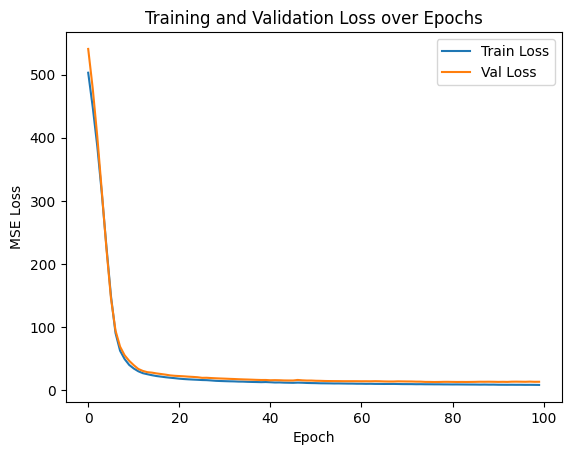

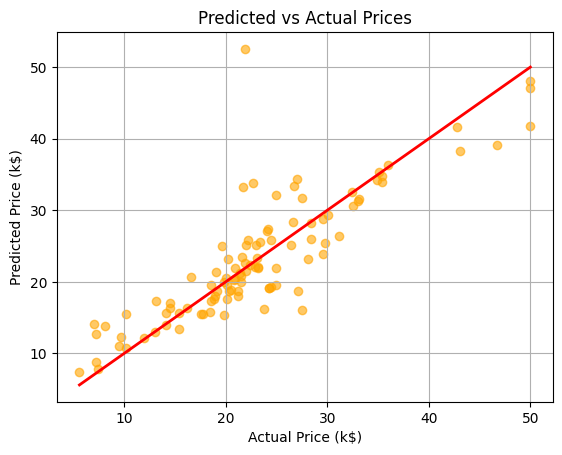

In [8]:
import matplotlib.pyplot as plt

# Loss curves
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('Training and Validation Loss over Epochs')
plt.show()

# Predicted vs Actual scatter
plt.scatter(y_test, y_pred, alpha=0.6, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linewidth=2)
plt.xlabel('Actual Price (k$)')
plt.ylabel('Predicted Price (k$)')
plt.title('Predicted vs Actual Prices')
plt.grid(True)
plt.show()


In [ ]:
# Ensure TensorFlow is installed

import tensorflow
from tensorflow.keras.datasets import boston_housing # type: ignore

# Load dataset (506 total samples, 13 features)
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
print("Training data shape:", x_train.shape, "Test data shape:", x_test.shape)
print("Training targets shape:", y_train.shape, "Test targets shape:", y_test.shape)


import numpy as np

# Compute mean and std on training features
feature_mean = np.mean(x_train, axis=0)
feature_std  = np.std(x_train, axis=0)

# Standardize training and test features
x_train_norm = (x_train - feature_mean) / feature_std
x_test_norm  = (x_test  - feature_mean) / feature_std


from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(13,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)   # Linear output for regression
])
model.summary()


model.compile(optimizer='adam', loss='mse', metrics=['mae'])



history = model.fit(
    x_train_norm, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

test_loss, test_mae = model.evaluate(x_test_norm, y_test, verbose=0)
print(f"Test MSE: {test_loss:.2f}, Test MAE: {test_mae:.2f}")

import matplotlib.pyplot as plt

# Loss curves
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('Training and Validation Loss over Epochs')
plt.show()

# Predicted vs Actual scatter
plt.scatter(y_test, y_pred, alpha=0.6, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linewidth=2)
plt.xlabel('Actual Price (k$)')
plt.ylabel('Predicted Price (k$)')
plt.title('Predicted vs Actual Prices')
plt.grid(True)
plt.show()

